In [1]:
#importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loding datasets
customers = pd.read_csv('/content/Customers.csv')
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
products = pd.read_csv('/content/Products.csv')
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
transactions = pd.read_csv('/content/Transactions.csv')
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
customers.shape

(200, 4)

In [8]:
products.shape

(100, 4)

In [9]:
transactions.shape

(1000, 7)

In [14]:
# missing values and data types checking
def data_overview(df, name):
    print(f"\n{name} Dataset Overview")
    print(df.info())
    print("Missing Values:\n", df.isnull().sum())
    print("Duplicate values:\n",df.duplicated().sum())


In [15]:
#overview of the datasets
data_overview(customers, "Customers")
data_overview(products, "Products")
data_overview(transactions, "Transactions")


Customers Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Duplicate values:
 0

Products Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Missing V

Observing the overview of three datasets, we are sure that there are no missing vales and duplicate values. So the next step involves converting "SignupDate","TransactionDate" to datetime

In [27]:
#converting data fields to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [29]:
#merging datasets
data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In the above code I have merged the 3 datasets using left join . i.e first merged transactions dataset and customers dataset on common column called customerID using left join this ensures that all records from transactions are presered and the maching records from customers are included , then again merged with products dataset on common column called productID using left join

In [30]:
data.rename(columns={'Price_x': 'TransactionPrice', 'Price_y': 'ListedPrice'}, inplace=True)

In [32]:
# Save merged dataset to a CSV file
data.to_csv("eCommerce Transactions_Dataset.csv", index=False)


After merging the datasets , I renamed the price_x , price_y columns inorder to avoid any confussions.Finally saved the  dataframe in a CSV file

In [35]:
df = pd.read_csv('/content/eCommerce Transactions_Dataset.csv')
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,TransactionPrice,CustomerName,Region,SignupDate,ProductName,Category,ListedPrice
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [36]:
df.shape

(1000, 13)

In [64]:
#converting data fields to datetime
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [65]:
def df_overview(df, name):
    print(f"\n{name} Dataset Overview")
    print(df.info())
    print("Missing Values:\n", df.isnull().sum())
    print("Duplicate values:\n",df.duplicated().sum())


In [66]:
df_overview(df,"eCommerce Transactions_Dataset")


eCommerce Transactions_Dataset Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TransactionID     1000 non-null   object        
 1   CustomerID        1000 non-null   object        
 2   ProductID         1000 non-null   object        
 3   TransactionDate   1000 non-null   datetime64[ns]
 4   Quantity          1000 non-null   int64         
 5   TotalValue        1000 non-null   float64       
 6   TransactionPrice  1000 non-null   float64       
 7   CustomerName      1000 non-null   object        
 8   Region            1000 non-null   object        
 9   SignupDate        1000 non-null   datetime64[ns]
 10  ProductName       1000 non-null   object        
 11  Category          1000 non-null   object        
 12  ListedPrice       1000 non-null   float64       
dtypes: datetime64[ns](2), float64(

The final dataset doesn't contain any missing values and duplicate values and all the 1000 records from transactions dataset are preserved , hence the "dataset eCommerce Transactions_Dataset" is ready for EDA

*EXPLORATORY DATA ANALYSIS*

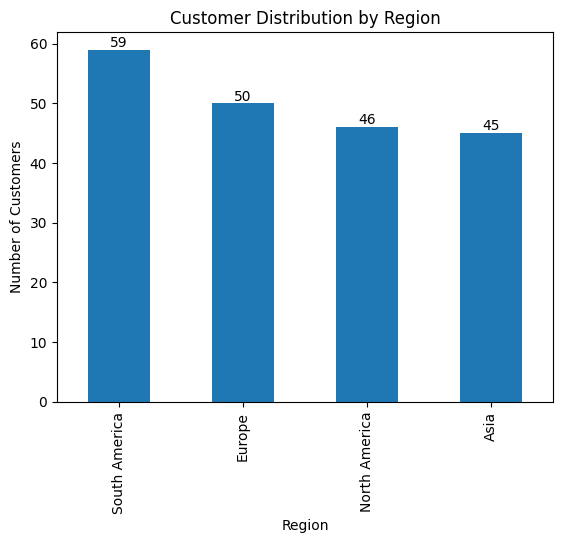

In [67]:
#Customer Distribution by Region
region_distribution = customers['Region'].value_counts()
ax=region_distribution.plot(kind='bar', title='Customer Distribution by Region')
plt.ylabel("Number of Customers")
ax.bar_label(ax.containers[0])
plt.show()


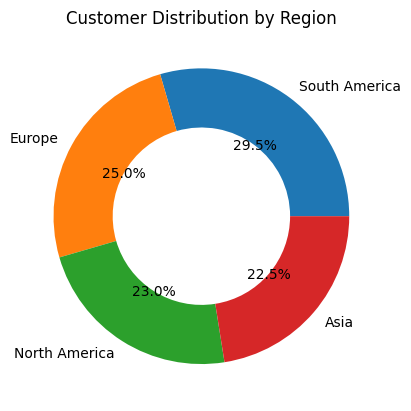

In [68]:
region_distribution = customers['Region'].value_counts()
plt.pie(region_distribution, labels=region_distribution.index,autopct='%1.1f%%', wedgeprops={'width': 0.4} )
plt.title('Customer Distribution by Region')
plt.show()


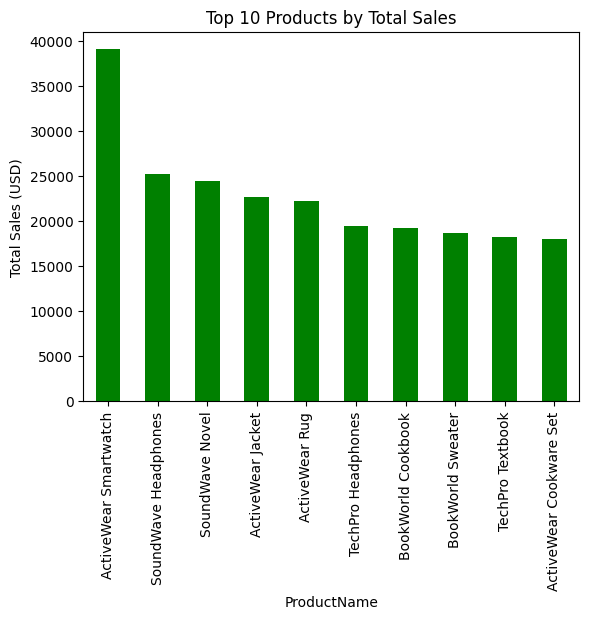

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


In [69]:
#Top 10 Products by Total Sales
product_sales = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
ax2=product_sales.plot(kind='bar', title='Top 10 Products by Total Sales', color='green')
plt.ylabel("Total Sales (USD)")
plt.show()
print(product_sales)

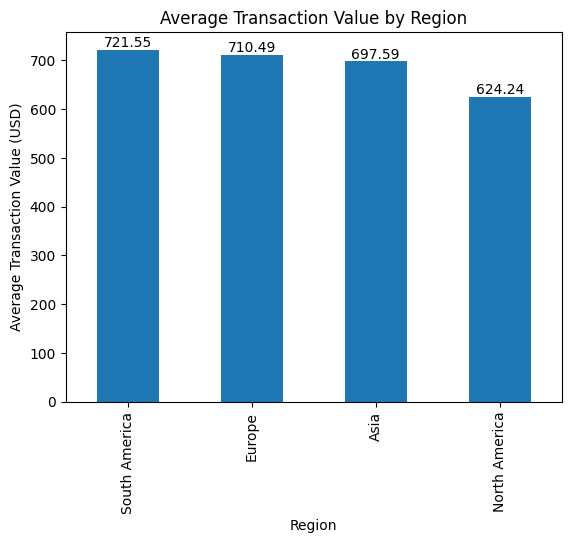

In [70]:
#Average Transaction Value per Region
region_transaction_value = df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
ax3=region_transaction_value.plot(kind='bar', title='Average Transaction Value by Region')
plt.ylabel("Average Transaction Value (USD)")
ax3.bar_label(ax3.containers[0], fmt='%.2f')
plt.show()

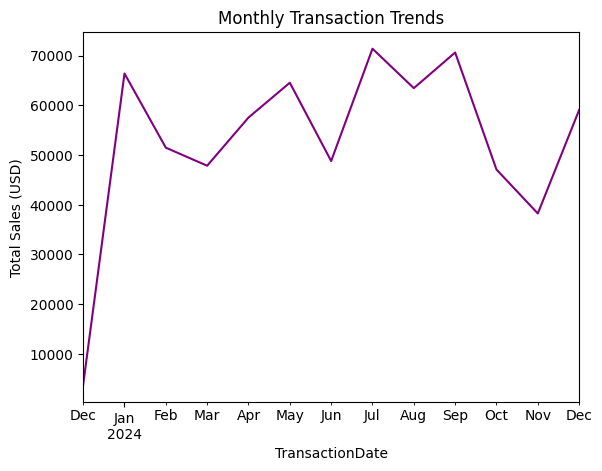

In [73]:
# Monthly Transaction Trends
monthly_trends = df.set_index('TransactionDate').resample('ME')['TotalValue'].sum()
monthly_trends.plot(title='Monthly Transaction Trends', color='purple')
plt.ylabel("Total Sales (USD)")
plt.show()

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


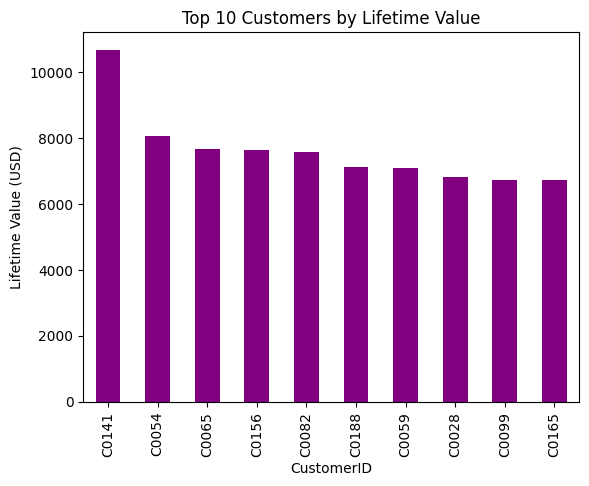

In [78]:
#Customer Lifetime Value (CLV)
customer_ltv = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
customer_ltv.plot(kind='bar', title='Top 10 Customers by Lifetime Value', color='purple')
plt.ylabel("Lifetime Value (USD)")
print(customer_ltv)
plt.show()